<a href="https://colab.research.google.com/github/SRegaard/Workshop-1./blob/main/TopicRecommend_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simulering og visualisering af Alice's algoritme udvikling på Youtube
- ### Jeg går ud fra at Alice trykker på 100 videoer og har de samme interesser igennem alle 100 kliks, men er åben overfor at se andre videoer som ikke er på hendes præferenceliste.
- ### Dermed er denne simulering en visualisering af, hvorvidt algoritmen fodre hendes interesser og hvornår den har lurret hendes interesser.

##Emner og vægte:

##Alice's interesser:

In [82]:
#Importer nødvendige biblioteker for at visualisere og forstå udviklingen

import matplotlib.pyplot as plt #Ti visualisering af data med grafer
import random # Importer random til at generere tilfædlige numre, til simulerings formål
import numpy as np # Til numeriske beregninger og farveskalaer

# Definer de emner, som kan anbefales på et feed
# Hver emne har en vægt, der angiver sandsynligheden for, at det anbefales af algoritmen
topics = {
    "Music": 10,
    "Film & Animation": 10,
    "Intertainment": 10,
    "News & Politics": 10,
    "Sports": 10,
    "Science & Technology": 10,
    "Education": 10,
    "Food & Drinks": 10
}

# Definerer Alice's interesser - der vil være en højere chance for at hun klikker på disse emner
alice_interests = ["Music", "Food & Drinks", "Sports"]

#Før alice trykker på en video på Youtube har hun disse interesser:
Vægten for hendes interesser er sat højere end de resterende topics. De har også en vægt for at kunne blive vist. Det viser dermed ikke at hun slet ikke interesserer sig for dem.



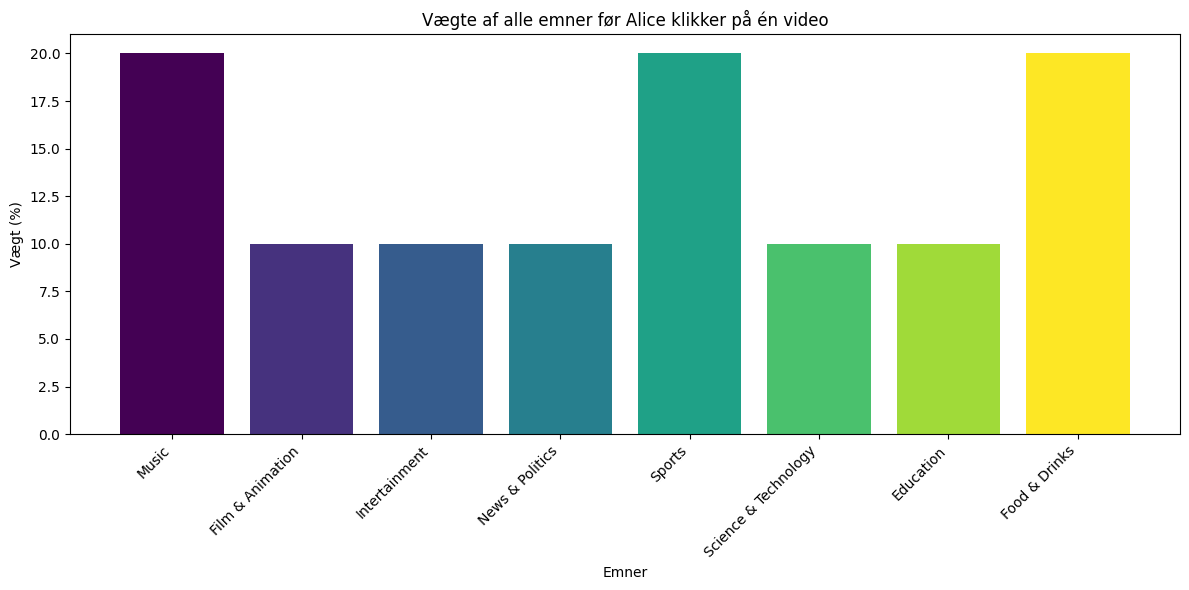

In [83]:
# Laver en ny dict som gennemgår alle emner fra Topics, hvis de findes i alice interesser ligges der 10 til den vægt
# Hvis den ikke eksistere i alice interesser, kopier fra den originale topics
adjusted_weights = [topics[topic] + 10 if topic in alice_interests else topics[topic] for topic in topics]

# Visualiser vægtene for alle emner
plt.figure(figsize=(12, 6))
plt.bar(topics.keys(), adjusted_weights, color=plt.cm.viridis(np.linspace(0, 1, len(topics))))  # Bruger viridis colormap til at ændre i farver på grafen
plt.xlabel("Emner")
plt.ylabel("Vægt (%)")
plt.title("Vægte af alle emner før Alice klikker på én video")
plt.xticks(rotation=45, ha="right")  # Rotér x-aksen for bedre læsbarhed
plt.tight_layout()  # Sørg for, at teksten ikke bliver skåret af
plt.show()

##Hovedlogik til simuleringen


In [84]:
# Funktion der simulerer et klik på et emne
# Når et emne klikkes på, øges dets vægt med 10, men kan ikke overstige 100.
# Ved at tilføje en minimumsværdi på 5, sikre vi at intet emne forsvinder helt fra feedet, selvom det sjældent klikkes på
def click_topic(topic):
    if topic in topics:
        topics[topic] = min(topics[topic] + 10, 100) # Den øger vægten af et emne med 10, men sikrer, at den ikke overstiger 100.
        topics[topic] = max(topics[topic],5) # Derefter sikrer den, at vægten ikke falder under 5.

# Omdan dictionary-nøgler (keys,topics) til en liste over emner for lettere behandling
all_topics = list(topics.keys())

# Opret en dictionary til at gemme vægtudviklingen over tid for hvert emne
history = {topic: [] for topic in all_topics}

# Hvis et emne har en vægt over 50, bruger jeg 0.99 (kun 1% decay pr. iteration)= Det holder sig længere i feedet
# Hvis et emne har en vægt på 50 eller lavere, bruger jeg 0.98 (2% decay pr iteration)= Det falder hurtigere i relevans
# Dette er funktionen for 'decay'. Når den kaldes påfører den decay på alle topics
def apply_decay():
    for topic in topics:
        dynamic_decay = 0.99 if topics[topic] > 50 else 0.98 # Mindre decay for populære emner
        topics[topic] = max(topics[topic] * dynamic_decay, 1)

# Her kunne man også implementere en tilfældig variabel på decay (for at simulere usikkerhed/=differentiated decay)
        #decay_factor =random.uniform (0.98,dynamic_decay)
        #topics[topic] = max(topics[topic] * decay_factor, 1)

# Tildeler højere vægte til Alice's favorit-emner for at afspejle hendes præferencer
selection_weights = [5 if topic in alice_interests else 1 for topic in all_topics]

# Antal clicks der simuleres
clicks = 100

# Simulerer interaktionerne med decay med en 'forløkke', som kører antal clicks
for i in range(clicks):
    # Før hvert click anvendes decay på alle emner
    apply_decay()

    # Her vælger jeg et emne tilfældigt med større sandsynlighed for Alice's favorit-emner
    random_topic = random.choices(all_topics, weights=selection_weights, k=1)[0]
    click_topic(random_topic)

    # Gemmer nuværende vægt for alle emner i historikken
    for topic in all_topics:
        history[topic].append(topics[topic])

# Så hvad er hendes chance for at få anbefalet et emne på YouTube feedet?

- #### Her visualiserer jeg resultaterne, hvor man kan se udviklingen fra 0-100 klik på alle emner. På grafen ses der en stor chance for at få vist de emner man interesserer sig for (Husk tilbage til den første graf).

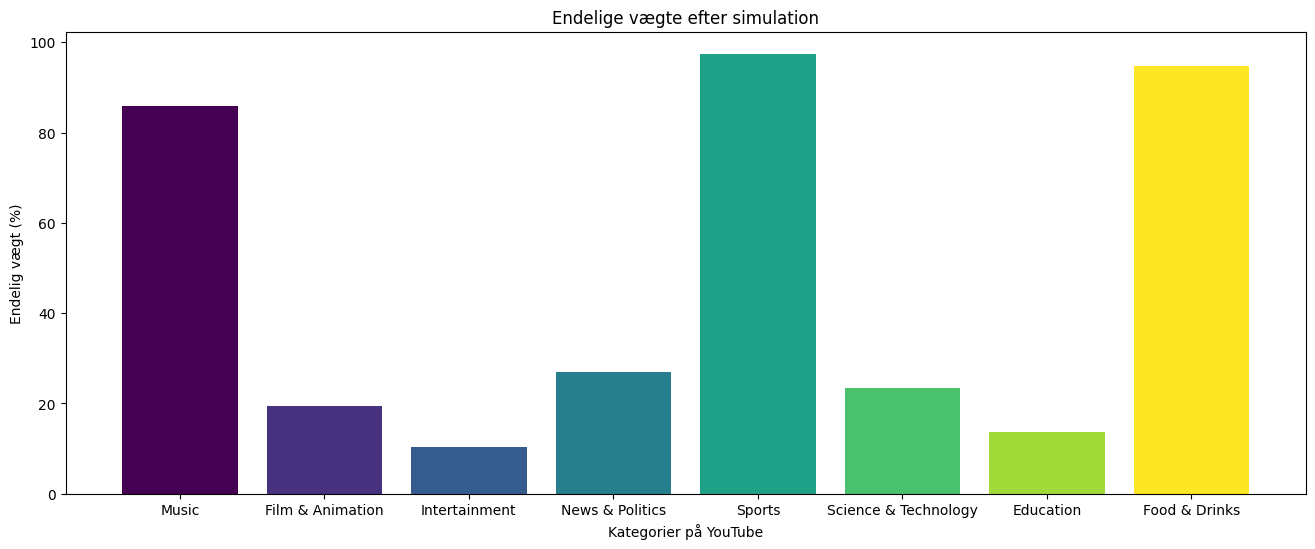

In [85]:
# Beregn de endelige vægte for hvert emne efter simulationen
final_weights = [history[topic][-1] for topic in all_topics]

# Generér en række farver fra colormap'et "viridis"
colors = plt.cm.viridis(np.linspace(0, 1, len(all_topics)))

plt.figure(figsize=(16, 6))
plt.bar(all_topics, final_weights, color=colors)
plt.xlabel("Kategorier på YouTube")
plt.ylabel("Endelig vægt (%)")
plt.title("Endelige vægte efter simulation")
plt.show()

# Visualisering af foreslags algoritme
- #### X representere antal clicks på den givne 'topic'
- #### Y representere chancen for at emnet vil optræde på brugerens feed
- #### Chance afmåles i procent 0 til 100%

## Hvad kan vi aflæse fra denne graf?
- #### Giver et groft estimat på hvor mange gange man skal clicke på et emne, for at øge chancen for visningen

- #### Illustere hvordan emner man clicker ofte på, opnår  udvikling hurtigere

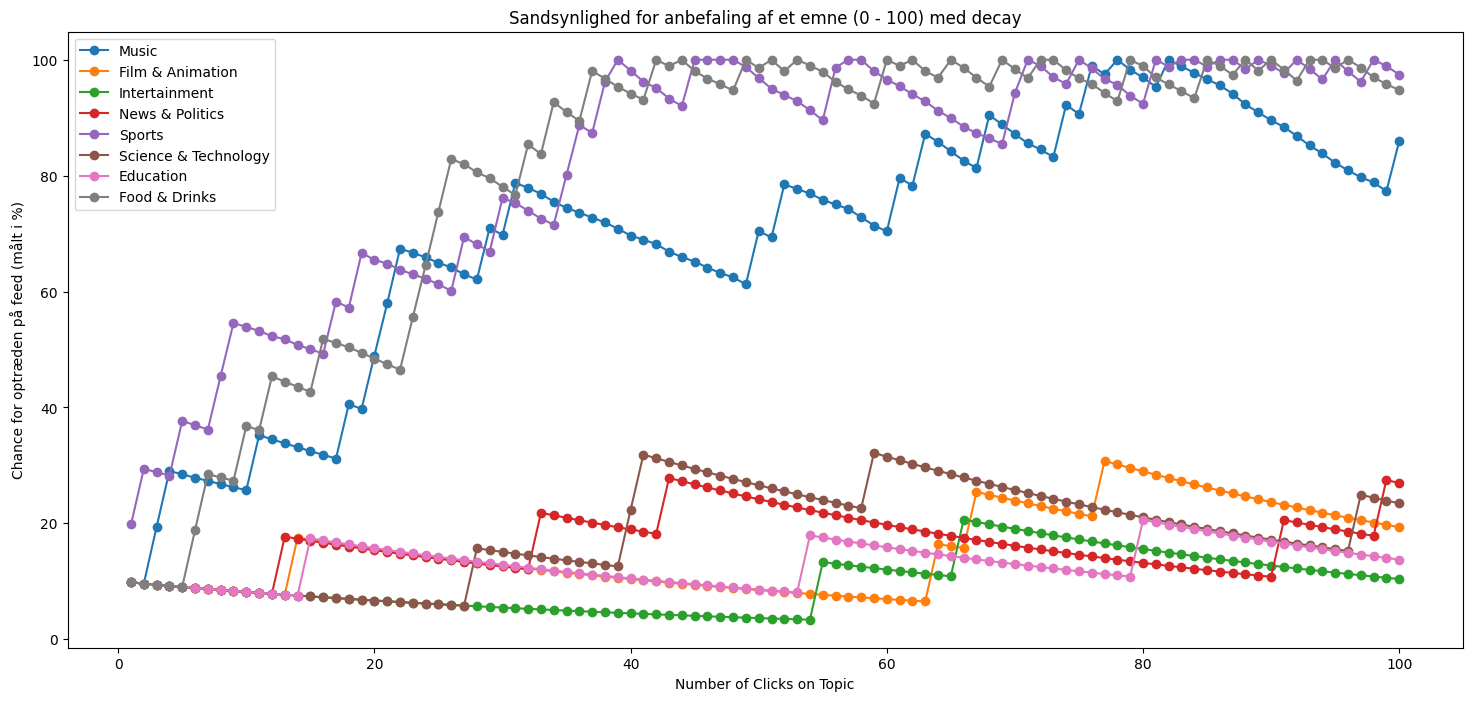

In [86]:
# Forbereder en variabel jeg kan bruge som x-akse (antal clicks)
click_numbers = list(range(1, clicks + 1))

# Plot historikken for alle emner
plt.figure(figsize=(18, 8))
for topic in all_topics:
    plt.plot(click_numbers, history[topic], marker='o', label=topic)

plt.xlabel("Number of Clicks on Topic")
plt.ylabel("Chance for optræden på feed (målt i %)")
plt.title("Sandsynlighed for anbefaling af et emne (0 - 100) med decay")
plt.legend()
plt.show()